In [1]:
import pandas as pd
import numpy as np



In [2]:
data_path = "extracted_data/AmesHousing.csv"
df=pd.read_csv(data_path)
df

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


In [3]:
#Basic Data Inspection
from abc import ABC, abstractmethod

import pandas as pd

#Abstract class for Data Inspection
#Subclass must implement inspect method.
class DataInspectionStarategy(ABC):
    @abstractmethod
    def inspect_data(self, data: pd.DataFrame) -> pd.DataFrame:
        pass
    
#Concrete Strategy for Data Inspection
class DatTypeInspectionStrategy(DataInspectionStarategy):
    def inspect_data(self, data: pd.DataFrame):
        
        print("\nData Types and Non-Null Counts:")
        print(data.info())
        

#concrete Strategy for Summary Satistics Inspection
class SummaryStrategyInspectionStrategy(DataInspectionStarategy):
    def inspect_data(self, data:pd.DataFrame):
        
        print("\nSummary Statistics (Numerical Features):")
        print(df.describe())
        
        print("\nSummary Statistics (Categorical Features):")
        print(df.describe(include=["O"]))
        
class DataInspector:
    def __init__(self,strategy: DataInspectionStarategy):
        
        self._strategy = strategy
        
        
    def set_strategy(self, strategy: DataInspectionStarategy):
        
        self._strategy = strategy
        
    def execute_inspection(self,df:pd.DataFrame):
        
        self._strategy.inspect_data(df)
        
        
    
        
    
    

    
    
    


In [4]:
data_inspector = DataInspector(DatTypeInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-n

In [5]:
data_inspector.set_strategy(SummaryStrategyInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026     

In [8]:
#Missing  Values Analysis

from abc import ABC,abstractmethod
import matplotlib.pyplot as plt 
import seaborn as sns

class MissingValuesAnalysisTemplate(ABC):
    def analyse(self,df: pd.DataFrame):
        self.identify_missing_values(df)
        self.visualize_missing_values(df)
        
    @abstractmethod
    def identify_missing_values(self,df:pd.DataFrame):
        pass
    
    @abstractmethod
    def visualize_missing_values():
        pass
    
#concrete class for missing value analysis
class SimpleissingValuesAnalysis(MissingValuesAnalysisTemplate):
    def identify_missing_values(self, df:pd.DataFrame):
        
        print("\n Missing Values Count by Column:")
        missing_values = df.isnull().sum()
        
        print(missing_values[missing_values>0])
        
    def visualize_missing_values(self, df:pd.DataFrame):
        
        print("\n Visualizing Missing Values..")
        plt.figure(figsize=(12,8))
        sns.heatmap(df.isnull(),cbar=False,cmap="viridis")
        plt.title("Missing Values Heatmap")
        plt.show()
        

        
        

        



 Missing Values Count by Column:
Lot Frontage       490
Alley             2732
Mas Vnr Type      1775
Mas Vnr Area        23
Bsmt Qual           80
Bsmt Cond           80
Bsmt Exposure       83
BsmtFin Type 1      80
BsmtFin SF 1         1
BsmtFin Type 2      81
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Electrical           1
Bsmt Full Bath       2
Bsmt Half Bath       2
Fireplace Qu      1422
Garage Type        157
Garage Yr Blt      159
Garage Finish      159
Garage Cars          1
Garage Area          1
Garage Qual        159
Garage Cond        159
Pool QC           2917
Fence             2358
Misc Feature      2824
dtype: int64

 Visualizing Missing Values..


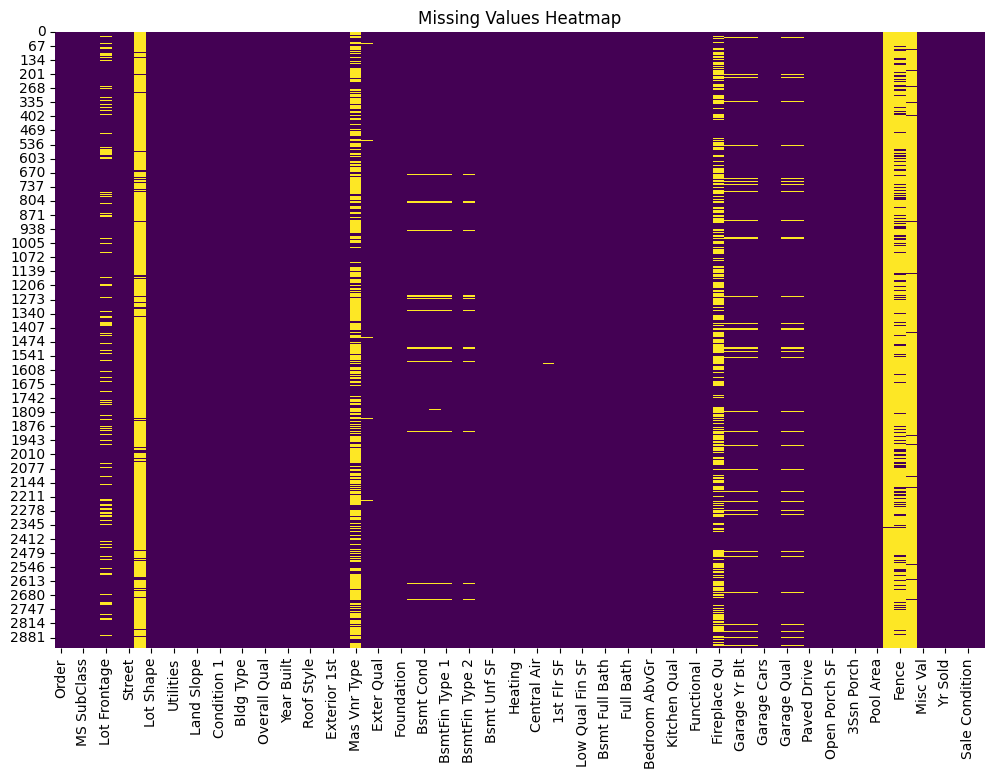

In [9]:
missing_values_analyzer = SimpleissingValuesAnalysis()
missing_values_analyzer.analyse(df)